In [1]:
'''
This file plots yearly annual mean tau from wombat_jra-iaf_mom025 in
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/SAMexp/figures

*** Run Yang.sh to mount data !! ***

Earl Duran 
created: 14-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [18]:
data_path = '/Users/earl/Desktop/Yang/'
figures_path = '/Users/earl/Dropbox/wombat_jra-iaf_mom025/figures/'

file_number = list(range(1958, 2015, 1))

temp = xr.open_dataset(data_path + 'temp_1958-2014.nc')['temp']
t_lat = xr.open_dataset(data_path + 'temp_1958-2014.nc')['yt_ocean']
t_lon1 = xr.open_dataset(data_path + 'temp_1958-2014.nc')['xt_ocean']
t_lon = t_lon1 + 360
temp_mean = np.mean(temp, axis=0)
temp_anom = temp - temp_mean

tau_x = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['tau_x']
tau_y = xr.open_dataset(data_path + 'tau_y_1958-2014.nc')['tau_y']
u_lat = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['yu_ocean']
u_lon1 = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['xu_ocean']
u_lon = u_lon1 + 360
tau_x_mean = np.mean(tau_x, axis=0)

script_name = nb_name[:-6]
print(script_name)
print(temp_mean.shape)

p02_plot_checkerboard_TS
(220, 280)


In [4]:
lon_start = 110
lat_start = -30

boxes_lon_n = 5
boxes_lat_n = 5

boxes_lon_size = 10
boxes_lat_size = 5

boxes_lon = {}
boxes_lat = {}
boxes_t_lon_idx = {}
boxes_t_lat_idx = {}
boxes_u_lon_idx = {}
boxes_u_lat_idx = {}

temp_anom_boxes = {}
tau_x_boxes = {}

temp_anom_boxes_mean = {}
tau_x_boxes_mean = {}

temp_anom_boxes_std = {}
tau_x_boxes_std = {}

for lon_idx in range(boxes_lon_n):
    for lat_idx in range(boxes_lat_n):
        
        boxes_lon[str(lon_idx)+','+str(lat_idx)] = [lon_start+lon_idx*10, lon_start+(lon_idx+1)*10]
        boxes_lat[str(lon_idx)+','+str(lat_idx)] = [lat_start-lat_idx*5, lat_start-(lat_idx+1)*5]
        
        boxes_t_lon_idx[str(lon_idx)+','+str(lat_idx)] = \
        (t_lon >= boxes_lon[str(lon_idx)+','+str(lat_idx)][0]) * \
        (t_lon <= boxes_lon[str(lon_idx)+','+str(lat_idx)][1])
        boxes_t_lat_idx[str(lon_idx)+','+str(lat_idx)] = \
        (t_lat <= boxes_lat[str(lon_idx)+','+str(lat_idx)][0]) * \
        (t_lat >= boxes_lat[str(lon_idx)+','+str(lat_idx)][1])
        
        boxes_u_lon_idx[str(lon_idx)+','+str(lat_idx)] = \
        (u_lon >= boxes_lon[str(lon_idx)+','+str(lat_idx)][0]) * \
        (u_lon <= boxes_lon[str(lon_idx)+','+str(lat_idx)][1])
        boxes_u_lat_idx[str(lon_idx)+','+str(lat_idx)] = \
        (u_lat <= boxes_lat[str(lon_idx)+','+str(lat_idx)][0]) * \
        (u_lat >= boxes_lat[str(lon_idx)+','+str(lat_idx)][1])
        
        temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)] = []
        tau_x_boxes_mean[str(lon_idx)+','+str(lat_idx)] = []

        for idx, t in enumerate(file_number):
            temp_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)] = \
            temp_anom[:,:,boxes_t_lon_idx[str(lon_idx)+','+str(lat_idx)]]\
            [:,boxes_t_lat_idx[str(lon_idx)+','+str(lat_idx)]]\
            [idx]
            
            tau_x_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)] = \
            tau_x[:,:,boxes_u_lon_idx[str(lon_idx)+','+str(lat_idx)]]\
            [:,boxes_u_lat_idx[str(lon_idx)+','+str(lat_idx)]]\
            [idx]
            
            temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)].append(
                np.nanmean(temp_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)]))
            
            tau_x_boxes_mean[str(lon_idx)+','+str(lat_idx)].append(
                np.nanmean(tau_x_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)]))
            
            
        temp_anom_boxes_std[str(lon_idx)+','+str(lat_idx)] = \
        np.nanstd(temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)])

        tau_x_boxes_std[str(lon_idx)+','+str(lat_idx)] = \
        np.nanstd(tau_x_boxes_mean[str(lon_idx)+','+str(lat_idx)])
            

print([str(lon_idx)+','+str(lat_idx)])
#print(temp_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)])
print(temp_anom_boxes_mean['0,0'])
print(temp_anom_boxes_std[str(lon_idx)+','+str(lat_idx)])

with open('checkerboard.pkl', 'wb') as f:
    pickle.dump(\
                [boxes_t_lon_idx, boxes_t_lat_idx,\
                 temp_anom_boxes, tau_x_boxes, \
                 temp_anom_boxes_mean, tau_x_boxes_mean,\
                 temp_anom_boxes_std, tau_x_boxes_std], f)


/Users/earl/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
/Users/earl/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice
/Users/earl/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


['4,4']
[0.012799399, 0.35780829, -0.32647544, 0.35423476, 0.65299821, 0.61316681, -0.17208701, 0.0067140944, 0.076477744, 0.29036522, -0.58956671, -0.13700098, -0.11663806, -0.20088685, 0.30049452, -0.17865859, -0.040634736, 0.45448187, 0.5244025, 0.20830919, 0.75462216, -0.001710946, -0.092275977, -0.51069415, -0.36128318, 0.6128788, 0.20261222, 0.2814393, -0.46241087, -0.37999082, -0.010586647, 0.37870684, -0.35753152, -0.0067102797, -0.11573011, -0.59693217, 0.11517212, 0.054351851, -0.00061994261, 0.087792814, 0.019780084, 0.25380334, 0.31821755, -0.2481339, -0.41121468, -0.53246099, -0.50794464, -0.64322668, -0.43521237, -0.55520552, 0.005645277, -0.42355269, -0.14287348, 0.84655917, 0.60277653, 0.15646113, 0.015179281]
0.220036


In [5]:
bm = Basemap(projection='mill', llcrnrlat=-60,urcrnrlat=-20,\
llcrnrlon=100,urcrnrlon=170, resolution='c')

matplotlib.rcParams.update({'font.size': 14}) 
row = 10
col = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: ax

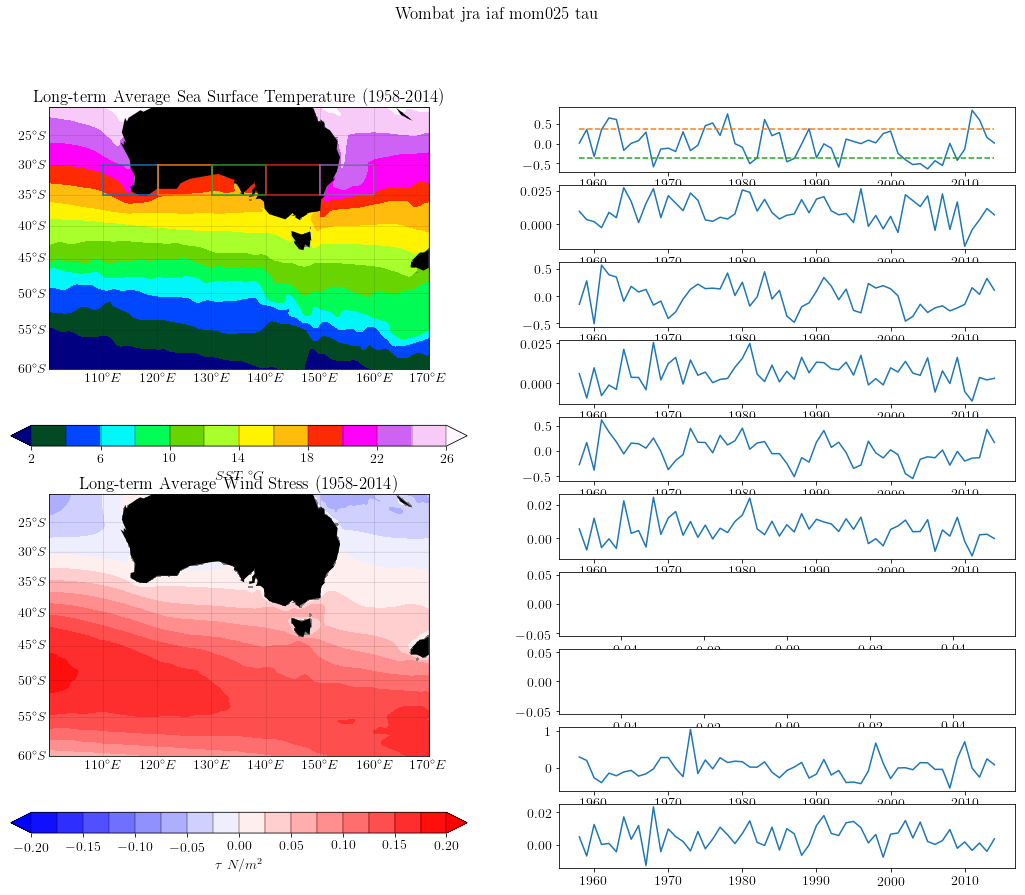

In [32]:
# for lat_idx in range(boxes_lat_n):
for lat_idx in range(1):
    plt.close('all') 
    fig = plt.figure() 
    fig.set_size_inches(18, 14)

    ax = plt.subplot2grid((row, col), (0, 0), rowspan=5)
    cmap = plt.get_cmap('gist_ncar')
    step = 2
    contf_lvls = np.arange(2,26+1e-08,step)              

    ax.set_facecolor('grey')
    bm.drawcoastlines(linewidth=0.05)
    bm.fillcontinents(color='black')

    lons, lats = np.meshgrid(t_lon, t_lat)
    Bm_lons, Bm_lats = bm(lons, lats) 

    contf = bm.contourf(Bm_lons, Bm_lats, temp_mean, contf_lvls, cmap=cmap, extend='both')
    
    for lon_idx in range(boxes_lon_n):
        Bm_boxes_lon, Bm_boxes_lat = bm(\
            [boxes_lon[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][0]],\
            [boxes_lat[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][0]])
        plot = bm.plot(Bm_boxes_lon,Bm_boxes_lat)

    ax.set_title('Long-term Average Sea Surface Temperature (1958-2014)')

    bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
    bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])

    cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
    cbar.set_label(r'$SST$ $^{\circ}C$') 
    cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])

    
    ax = plt.subplot2grid((row, col), (5, 0), rowspan=5)
    cmap = plt.get_cmap('bwr')
    step = 0.025
    contf_lvls = np.arange(-0.2,0.2+1e-08,step)              

    ax.set_facecolor('grey')
    bm.drawcoastlines(linewidth=0.05)
    bm.fillcontinents(color='black')

    lons, lats = np.meshgrid(u_lon, u_lat)
    Bm_lons, Bm_lats = bm(lons, lats) 

    contf = bm.contourf(Bm_lons, Bm_lats, tau_x_mean, contf_lvls, cmap=cmap, extend='both')

    ax.set_title('Long-term Average Wind Stress (1958-2014)')

    bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
    bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])

    cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
    cbar.set_label(r'$\tau$ $N/m^{2}$') 
    cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])




    ax = plt.subplot2grid((row, col), (0, 1))
    plot = plt.plot(file_number, temp_anom_boxes_mean['0,0'])
    plot = plt.plot([file_number[0], file_number[-1]], \
                    [temp_anom_boxes_std['0,0'], temp_anom_boxes_std['0,0']], '--')
    plot = plt.plot([file_number[0], file_number[-1]], \
                    [-temp_anom_boxes_std['0,0'], -temp_anom_boxes_std['0,0']], '--')

    ax = plt.subplot2grid((row, col), (1, 1))
    plot = plt.plot(file_number, tau_x_boxes_mean['0,0'])

    ax = plt.subplot2grid((row, col), (2, 1))
    plot = plt.plot(file_number, temp_anom_boxes_mean['1,0'])

    ax = plt.subplot2grid((row, col), (3, 1))
    plot = plt.plot(file_number, tau_x_boxes_mean['1,0'])

    ax = plt.subplot2grid((row, col), (4, 1))
    plot = plt.plot(file_number, temp_anom_boxes_mean['2,0'])

    ax = plt.subplot2grid((row, col), (5, 1))
    plot = plt.plot(file_number, tau_x_boxes_mean['2,0'])

    ax = plt.subplot2grid((row, col), (6, 1))
    plot = plt.plot(file_number, temp_anom_boxes_mean['3,0'])

    ax = plt.subplot2grid((row, col), (7, 1))
    plot = plt.plot(file_number, tau_x_boxes_mean['3,0'])

    ax = plt.subplot2grid((row, col), (8, 1))
    plot = plt.plot(file_number, temp_anom_boxes_mean['4,0'])

    ax = plt.subplot2grid((row, col), (9, 1))
    plot = plt.plot(file_number, tau_x_boxes_mean['4,0'])

    plt.suptitle(r"Wombat jra iaf mom025 tau")


In [24]:
print([file_number[0], file_number[-1]])

[1958, 2014]


In [34]:
plt.suptitle(r"Wombat jra iaf mom025 tau")

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)

plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + str(t) + '.png', bbox_inches='tight', dpi=200)